In [1]:
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier as RFC 
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [4]:
data = pd.read_csv("digit_recognizor.csv")

In [5]:
X = data.iloc[:,1:]
y = data.iloc[:,0]

X.shape

(42000, 784)

### Step 1: plot accumulative-variance curve, to find the best features range

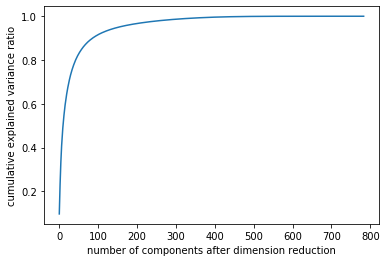

In [10]:
pca_line = PCA().fit(X)

plt.figure()
plt.plot(np.cumsum(pca_line.explained_variance_ratio_)) #cumsum*
plt.xlabel("number of components after dimension reduction")
plt.ylabel("cumulative explained variance ratio")
plt.show()

### Step 2: after PCA() learning curve, smaller the best feature range

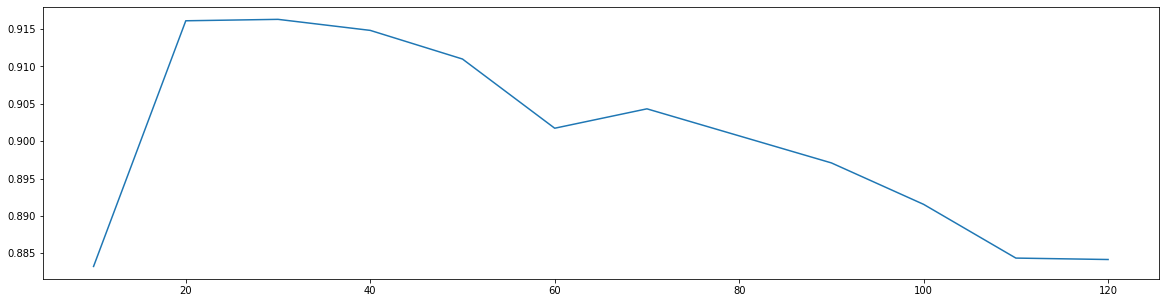

In [19]:
score = []

for i in range(10, 121, 10):
    X_dr = PCA(i).fit_transform(X)
    once = cross_val_score(RFC(n_estimators=10,random_state=0)
                                , X_dr, y, cv=5).mean()
        #cross_val_score(The object to use to fit the data, X, y, cv )
    score.append(once)

plt.figure(figsize=[20,5])
plt.plot(range(10, 121, 10), score)
plt.show()

### Step 3: Smaller the range again - learning curve

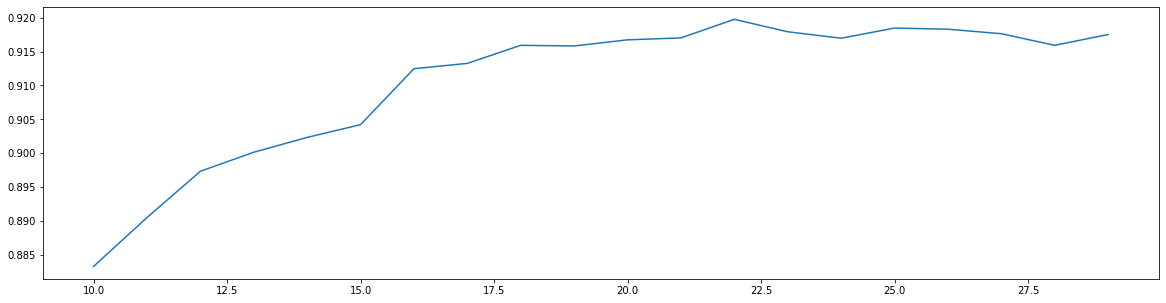

In [21]:
score1 = []

for i in range(10,30):
    X_dr = PCA(i).fit_transform(X)
    once = cross_val_score(RFC(n_estimators=10,random_state=0),X_dr,y,cv=5).mean() 
    score1.append(once)

plt.figure(figsize=[20,5]) 
plt.plot(range(10,30),score1)
plt.show()

### Step 4: Get the best features performance, check the model

In [26]:
X_dr = PCA(22).fit_transform(X)
                #adject tree number to 100 - generalization error
cross_val_score(RFC(n_estimators=100,random_state=0),X_dr,y,cv=5).mean()

0.9452380952380952

## How to improve the cross_validation_score? Change modeling method?

### Let's check KNN

In [27]:
from sklearn.neighbors import KNeighborsClassifier as KNN
cross_val_score(KNN(), X_dr, y, cv=5).mean()

0.9686190476190475

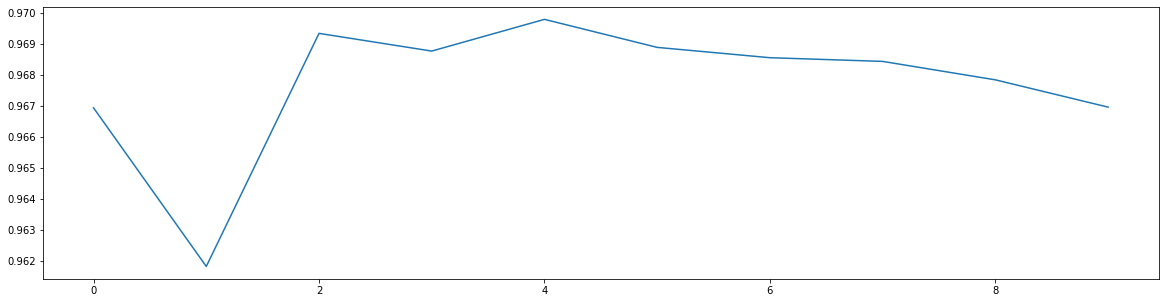

In [28]:
score2 = []

for i in range(10):
    X_dr = PCA(23).fit_transform(X)
    once = cross_val_score(KNN(i+1),X_dr,y,cv=5).mean() 
    score2.append(once)

plt.figure(figsize=[20,5]) 
plt.plot(range(10),score2) 
plt.show()

### How does the model work and how does the model run?

In [29]:
cross_val_score(KNN(4),X_dr,y,cv=5).mean()

0.9689523809523809

In [30]:
%%timeit 
cross_val_score(KNN(4),X_dr,y,cv=5).mean()

28.5 s ± 911 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [36]:
KNN(4).fit(X_dr, y).score(X_dr, y)

0.9822380952380952